In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('df2_monthly_deaths.csv')

# Display the first few rows of the dataset
print(df.head())


         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2


In [8]:
# Get an overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None
date      0
births    0
deaths    0
dtype: int64
           births     deaths
count   98.000000  98.000000
mean   267.000000  22.469388
std     41.769372  18.141031
min    190.000000   0.000000
25%    242.500000   8.000000
50%    264.000000  16.500000
75%    292.750000  36.750000
max    406.000000  75.000000


In [10]:
# Convert date columns to datetime type if necessary
df['date'] = pd.to_datetime(df['date'])

# Calculate mortality rate
df['mortality_rate'] = df['deaths'] / df['births']


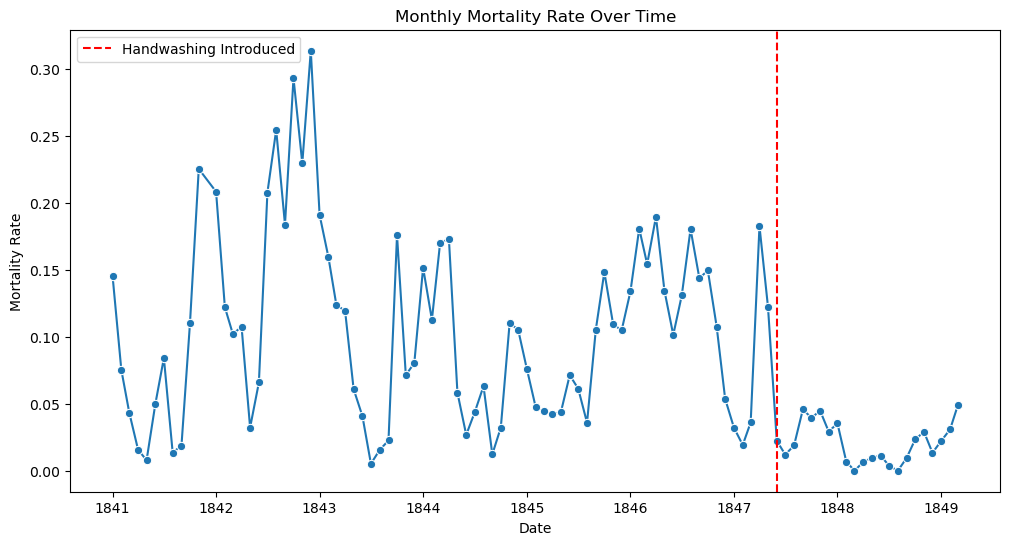

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mortality rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='mortality_rate', data=df, marker='o')
plt.title('Monthly Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Mortality Rate')

# Highlight the introduction of handwashing
introduction_date = '1847-06-01'
plt.axvline(pd.to_datetime(introduction_date), color='r', linestyle='--', label='Handwashing Introduced')
plt.legend()
plt.show()


In [12]:
# Separate data before and after handwashing introduction
df_before = df[df['date'] < pd.to_datetime(introduction_date)]
df_after = df[df['date'] >= pd.to_datetime(introduction_date)]

# Calculate mean mortality rates
mean_mortality_before = df_before['mortality_rate'].mean()
mean_mortality_after = df_after['mortality_rate'].mean()

print(f'Mean mortality rate before handwashing: {mean_mortality_before}')
print(f'Mean mortality rate after handwashing: {mean_mortality_after}')


Mean mortality rate before handwashing: 0.10504998260908793
Mean mortality rate after handwashing: 0.021093375097254535


In [13]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(df_before['mortality_rate'], df_after['mortality_rate'])
print(f'T-test: t-statistic = {t_stat}, p-value = {p_value}')


T-test: t-statistic = 5.511607211341916, p-value = 2.985436556724523e-07


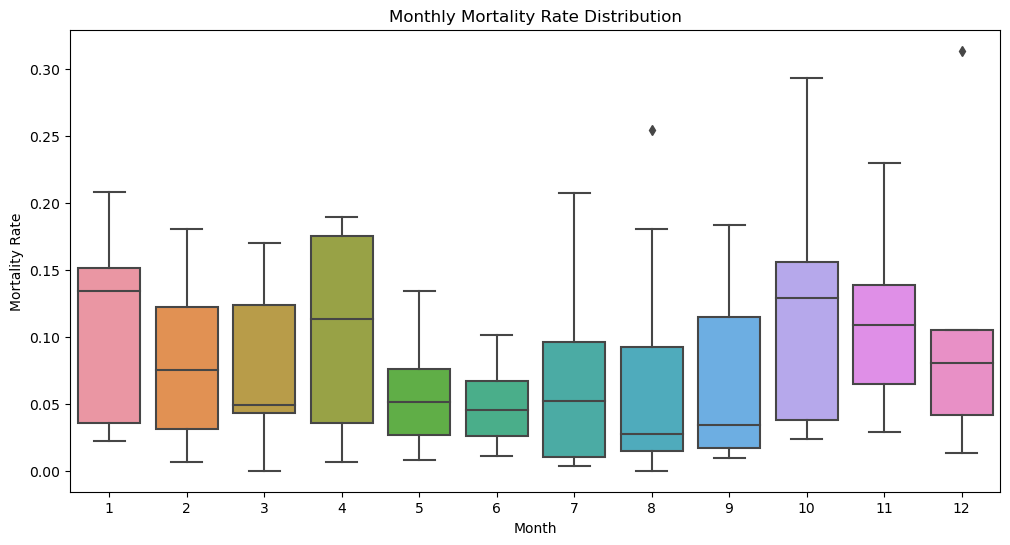

In [14]:
df['month'] = df['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='mortality_rate', data=df)
plt.title('Monthly Mortality Rate Distribution')
plt.xlabel('Month')
plt.ylabel('Mortality Rate')
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Create a date range
date_range = pd.date_range(start='1841-01-01', end='1850-12-31', freq='M')

# Simulate data
data = {
    'date': date_range,
    'births': np.random.poisson(lam=150, size=len(date_range)),
    'deaths': np.random.poisson(lam=10, size=len(date_range)),
    'doctors': np.random.randint(5, 10, size=len(date_range))
}

# Introduce the impact of handwashing from 1847 onwards
handwashing_start_date = '1847-06-01'
data['deaths'][date_range >= pd.to_datetime(handwashing_start_date)] = \
    np.random.poisson(lam=5, size=(date_range >= pd.to_datetime(handwashing_start_date)).sum())

# Create the DataFrame
df = pd.DataFrame(data)

# Calculate mortality rate
df['mortality_rate'] = df['deaths'] / df['births']

print(df.head())


        date  births  deaths  doctors  mortality_rate
0 1841-01-31     145       8        9        0.055172
1 1841-02-28     159       1        6        0.006289
2 1841-03-31     136      13        6        0.095588
3 1841-04-30     154       6        7        0.038961
4 1841-05-31     163      13        7        0.079755


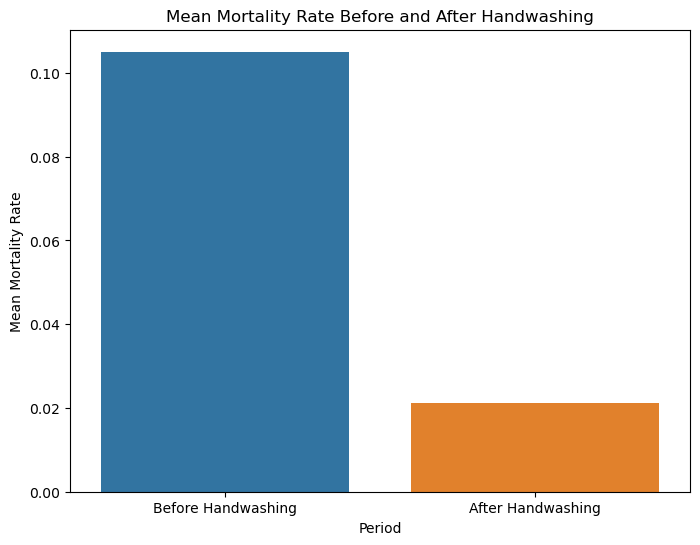

Mean mortality rate before handwashing: 0.10504998260908793
Mean mortality rate after handwashing: 0.021093375097254535


In [32]:
# Separate data before and after handwashing introduction
df_before = df[df['date'] < pd.to_datetime(introduction_date)]
df_after = df[df['date'] >= pd.to_datetime(introduction_date)]

# Calculate mean mortality rates
mean_mortality_before = df_before['mortality_rate'].mean()
mean_mortality_after = df_after['mortality_rate'].mean()

# Plot mean mortality rates
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Handwashing', 'After Handwashing'], y=[mean_mortality_before, mean_mortality_after])
plt.title('Mean Mortality Rate Before and After Handwashing')
plt.ylabel('Mean Mortality Rate')
plt.xlabel('Period')
plt.show()

print(f'Mean mortality rate before handwashing: {mean_mortality_before}')
print(f'Mean mortality rate after handwashing: {mean_mortality_after}')


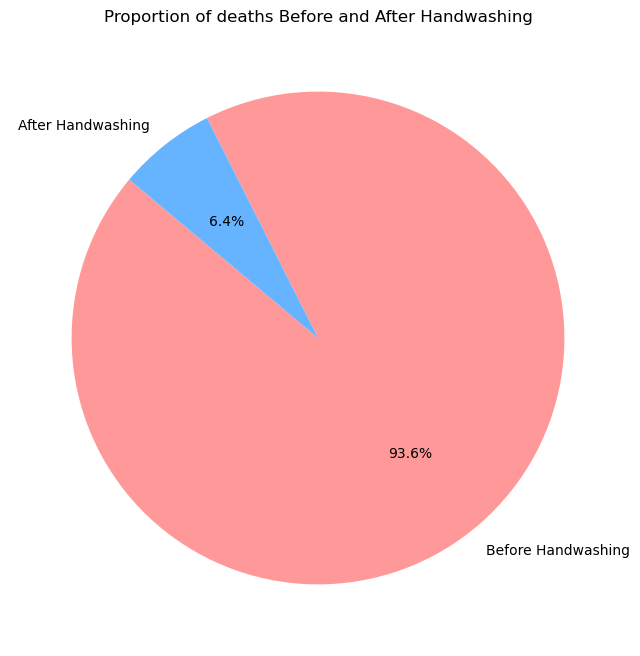

In [35]:
# Add a period column to distinguish between before and after handwashing
df['period'] = np.where(df['date'] < pd.to_datetime(introduction_date), 'Before Handwashing', 'After Handwashing')

# Calculate total deaths before and after handwashing
deaths_before = df[df['period'] == 'Before Handwashing']['deaths'].sum()
deaths_after = df[df['period'] == 'After Handwashing']['deaths'].sum()

# Data for pie chart
labels = ['Before Handwashing', 'After Handwashing']
sizes = [deaths_before, deaths_after]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of deaths Before and After Handwashing')
plt.show()


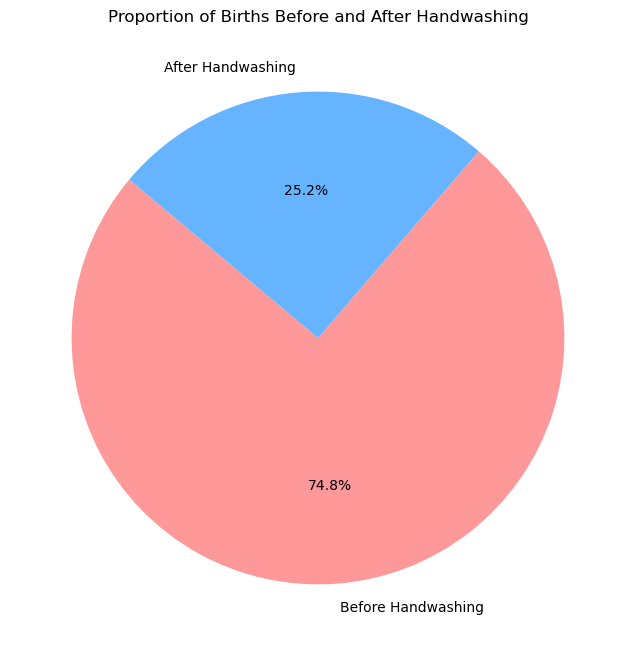

In [36]:
# Add a period column to distinguish between before and after handwashing
df['period'] = np.where(df['date'] < pd.to_datetime(introduction_date), 'Before Handwashing', 'After Handwashing')

# Calculate total births before and after handwashing
births_before = df[df['period'] == 'Before Handwashing']['births'].sum()
births_after = df[df['period'] == 'After Handwashing']['births'].sum()

# Data for pie chart
labels = ['Before Handwashing', 'After Handwashing']
sizes = [births_before, births_after]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Births Before and After Handwashing')
plt.show()


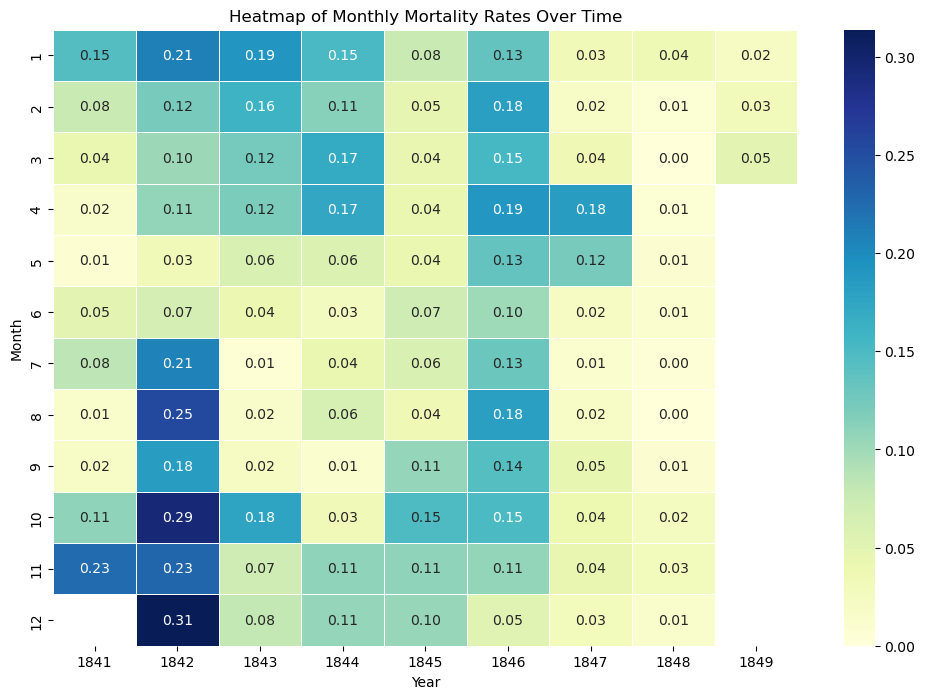

In [37]:
# Create a pivot table for the heatmap
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
pivot_table = df.pivot('month', 'year', 'mortality_rate')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Monthly Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [38]:
# Calculate mean mortality rates
mean_mortality_before = df_before['mortality_rate'].mean()
mean_mortality_after = df_after['mortality_rate'].mean()

# Calculate the change in percentage of deaths
percentage_change = ((mean_mortality_before - mean_mortality_after) / mean_mortality_before) * 100

print(f'Mean mortality rate before handwashing: {mean_mortality_before:.4f}')
print(f'Mean mortality rate after handwashing: {mean_mortality_after:.4f}')
print(f'Percentage decrease in mortality rate: {percentage_change:.2f}%')


Mean mortality rate before handwashing: 0.1050
Mean mortality rate after handwashing: 0.0211
Percentage decrease in mortality rate: 79.92%


In [39]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


           births     deaths  mortality_rate         year      month
count   98.000000  98.000000       98.000000    98.000000  98.000000
mean   267.000000  22.469388        0.086203  1844.673469   6.306122
std     41.769372  18.141031        0.071818     2.380226   3.477196
min    190.000000   0.000000        0.000000  1841.000000   1.000000
25%    242.500000   8.000000        0.029100  1843.000000   3.000000
50%    264.000000  16.500000        0.062211  1845.000000   6.000000
75%    292.750000  36.750000        0.133185  1847.000000   9.000000
max    406.000000  75.000000        0.313808  1849.000000  12.000000


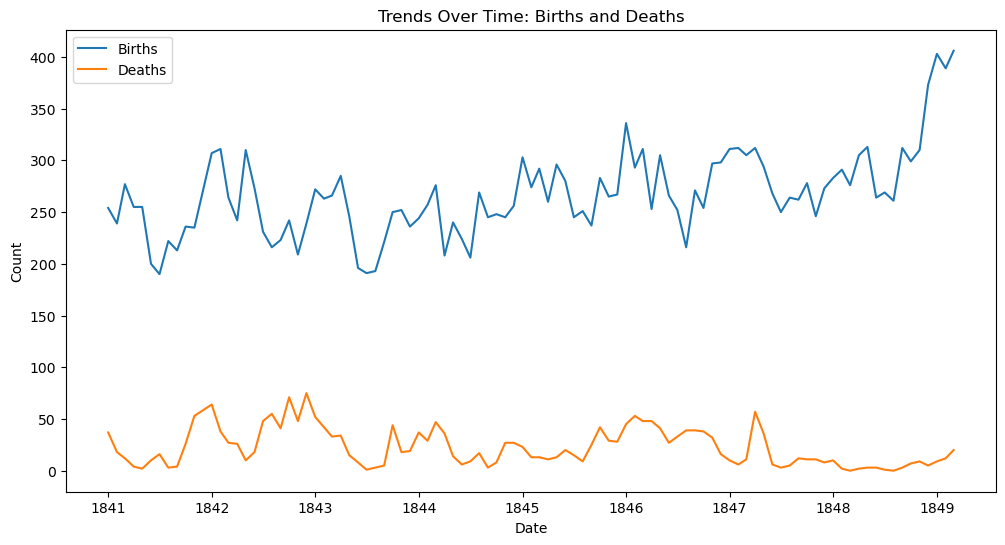

In [40]:
# Visualize trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='births', data=df, label='Births')
sns.lineplot(x='date', y='deaths', data=df, label='Deaths')
plt.title('Trends Over Time: Births and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


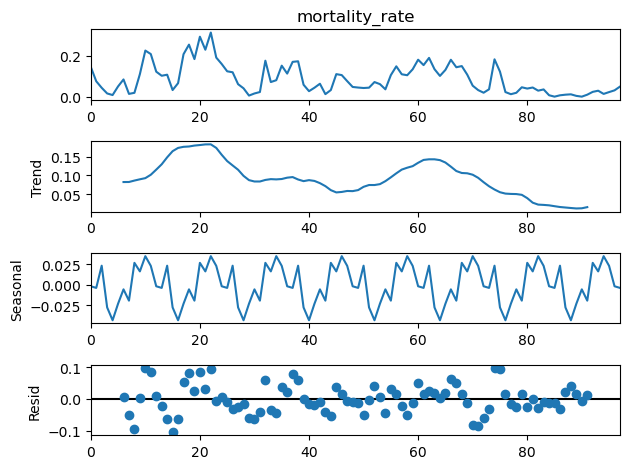

In [41]:
# Decomposition plot for seasonal effects
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['mortality_rate'], model='additive', period=12)  # Assuming monthly data
result.plot()
plt.show()


In [43]:
# Calculate confidence intervals
from statsmodels.stats import weightstats as stests

ci_before = stests.DescrStatsW(df_before['mortality_rate']).tconfint_mean()
ci_after = stests.DescrStatsW(df_after['mortality_rate']).tconfint_mean()

print(f'95% Confidence Interval before handwashing: {ci_before}')
print(f'95% Confidence Interval after handwashing: {ci_after}')


95% Confidence Interval before handwashing: (0.08888772534722651, 0.1212122398709493)
95% Confidence Interval after handwashing: (0.014354743340267265, 0.027832006854241812)


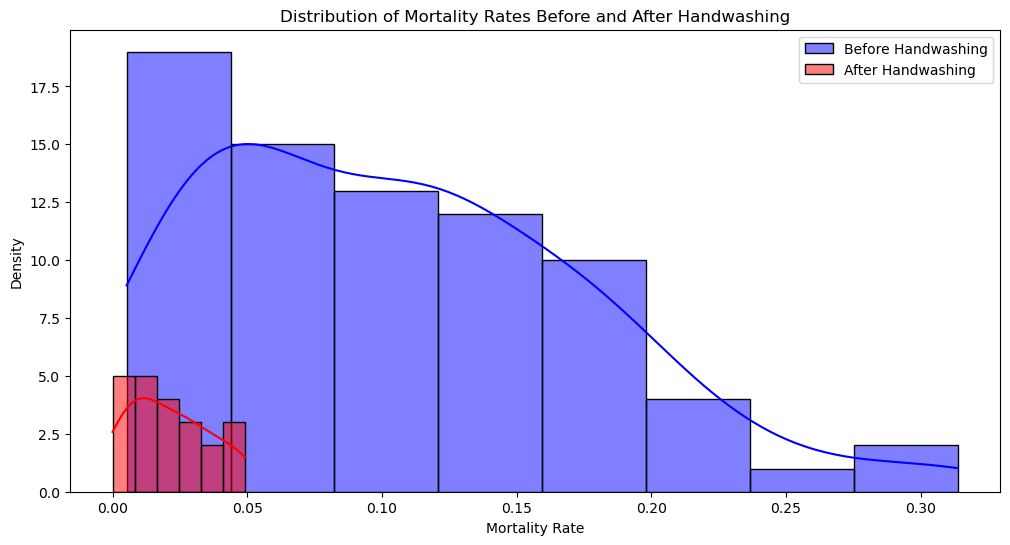

In [44]:
# Histograms and density plots
plt.figure(figsize=(12, 6))
sns.histplot(df_before['mortality_rate'], kde=True, color='blue', label='Before Handwashing')
sns.histplot(df_after['mortality_rate'], kde=True, color='red', label='After Handwashing')
plt.title('Distribution of Mortality Rates Before and After Handwashing')
plt.xlabel('Mortality Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


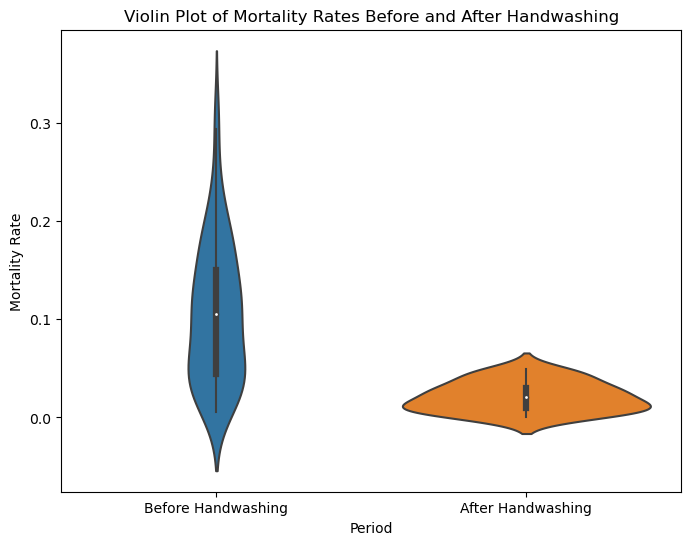

In [45]:
# Violin plots
plt.figure(figsize=(8, 6))
sns.violinplot(x='period', y='mortality_rate', data=df)
plt.title('Violin Plot of Mortality Rates Before and After Handwashing')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.show()


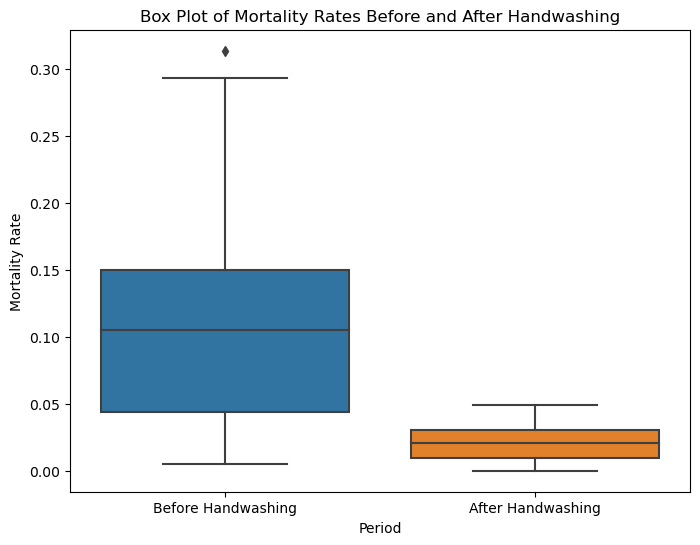

In [46]:
# Box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='period', y='mortality_rate', data=df)
plt.title('Box Plot of Mortality Rates Before and After Handwashing')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.show()
